In [1]:
import pandas as pd
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [2]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [4]:
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [5]:
len(train_df) + len(test_df)

10876

In [6]:
# shuffle the training data 
train_data = train_df.sample(frac =1, random_state = 42)
train_data.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [7]:
# visulize the data
import random
random_index = random.randint(0, len(train_df) - 5)

for row in train_data[["text", "target"]][random_index:random_index + 5].itertuples():
    _,text, target = row
    print(f"Target: {target}", "(real disater)" if target > 0 else "(not real disater)")
    print(f"Text: \n {text} \n")
    print("...\n")
    

Target: 0 (not real disater)
Text: 
 320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/vAM5POdGyw | @djicemoon | #Dubstep #TrapMusic #DnB #EDM #Dance #IcesÛ_ http://t.co/zEVakJaPcz 

...

Target: 1 (real disater)
Text: 
 Families to sue over Legionnaires: More than 40 families affected by the fatal outbreak of Legionnaires' disea... http://t.co/ZA4AXFJSVB 

...

Target: 0 (not real disater)
Text: 
 Had an awesome time gettin wrecked at bowling last night! http://t.co/Da9lZtOn1c 

...

Target: 1 (real disater)
Text: 
 Do babies actually get electrocuted from wall sockets? I'm wondering how I and those before me survived childhood. 

...

Target: 0 (not real disater)
Text: 
 Choking Hazard Prompts Recall Of Kraft Cheese Singles http://t.co/XGKyVF9t4f 

...



In [8]:
# split the data inot training and validation set
from sklearn.model_selection import train_test_split

train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_data["text"].to_numpy(),
                                                                           train_data["target"].to_numpy(),
                                                                           test_size =0.1,
                                                                           random_state = 42)

In [9]:
len(train_sentences), len(val_sentences), len(train_labels), len(val_labels)

(6851, 762, 6851, 762)

In [10]:
train_sentences[:10]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
       'Somehow find you and I collide http://t.co/Ee8RpOahPk',
       '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
       'destroy the free fandom honestly',
       'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
       '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
       'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
      dtype=object)

In [11]:
train_labels[:10]

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1], dtype=int64)

## Text Vectorization

In [12]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

In [13]:
# average number of words or tokens in training data
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [14]:
text_vectorizer = TextVectorization(max_tokens = 10000,
                                    output_mode = "int",
                                    output_sequence_length = 15)

In [15]:
# fit the text vectorizer to data
text_vectorizer.adapt(train_sentences)

In [16]:
# checking for the text vectorizer 
random_sentence = random.choice(train_sentences)
print(f"original {random_sentence}")
print(f"Vectorized: {text_vectorizer([random_sentence])}")

original @gigagil IOF murdered over 513 Palestinian children (70% under 12) during Gaza Massacre where was zionist morality-zionism is a world evil!
Vectorized: [[   1    1 2035   60    1 1382  656  325  204  719  246 1849  344  221
    23]]


In [17]:
# unique words in our dictionary
words_in_vocab = text_vectorizer.get_vocabulary()
top_5 = words_in_vocab[:5]
bottom_5 = words_in_vocab[-5:]

print("Vocab", len(words_in_vocab))
print("Top 5 words:", top_5)
print("Bottom 5 words:", bottom_5)

Vocab 10000
Top 5 words: ['', '[UNK]', 'the', 'a', 'in']
Bottom 5 words: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


## Creating Embeddings

In [18]:
tf.random.set_seed(42)
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim = 10000,
                            output_dim = 128,
                            embeddings_initializer = "uniform",
                            input_length = 15,
                            name = "embedding_1")
embedding

In [19]:
# example from sample data

random_sentence = random.choice(train_sentences)
print(f"original {random_sentence}")
print(f"Vectorized: {text_vectorizer([random_sentence])}")
print(f"Vectorized: {embedding(text_vectorizer([random_sentence]))}")

original Strange to encaustic cerography portion him till give voice deluge: bYITyf http://t.co/I7ap1MES8M
Vectorized: [[2280    5    1    1 3525  158 1108  947 1741  400    1    1    0    0
     0]]
Vectorized: [[[-0.02353978 -0.02540659  0.04194702 ... -0.04497161 -0.00761765
   -0.0481364 ]
  [-0.02069368 -0.01137885  0.0274169  ... -0.04205693  0.03579453
   -0.01549338]
  [ 0.02352029  0.04495715  0.03786638 ...  0.01067902 -0.01072424
   -0.02252221]
  ...
  [ 0.02039267  0.0322989   0.03699717 ...  0.02871038 -0.00801723
    0.02172089]
  [ 0.02039267  0.0322989   0.03699717 ...  0.02871038 -0.00801723
    0.02172089]
  [ 0.02039267  0.0322989   0.03699717 ...  0.02871038 -0.00801723
    0.02172089]]]


## Creating Our Models

### 0. Naive Bayes - Baseline

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# create tokenizartiona and modelling the pipeline
model_0 = Pipeline([
    
    ("tfdf", TfidfVectorizer()),
    ("clf", MultinomialNB())
])

model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfdf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [21]:
baseline_score = model_0.score(val_sentences, val_labels)
baseline_score

0.7926509186351706

In [22]:
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
      dtype=int64)

#### Creating Evaluation functions for our future use

In [23]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
    
    # accuracy
    model_accuracy = accuracy_score(y_true, y_pred) * 100
    
    # model_precision,f1_score, recall using weighted average
    model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
    
    model_results = {
        
        "accurracy": model_accuracy,
        "precision": model_precision,
        "recall": model_recall,
        "f1": model_f1
    }
    
    return model_results

In [24]:
baseline_results = calculate_results(y_true = val_labels,
                                     y_pred = baseline_preds)
baseline_results

{'accurracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

### Model 1 - Simple Dense

In [25]:
# importing helper functions
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [26]:
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

In [27]:
# create directory to save log 
SAVE_DIR = "model_logs"

In [28]:
# building the model 
inputs = layers.Input(shape=(1,), dtype = "string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation = "sigmoid")(x)
model_1 = tf.keras.Model(inputs, outputs, name = "model_1_choice")

In [29]:
# compile the model
model_1.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [30]:
model_1.summary()

Model: "model_1_choice"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129


In [31]:
# fit the model 
model_1_history = model_1.fit(train_sentences,
                              train_labels,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(dir_name=SAVE_DIR, 
                                                                     experiment_name="simple_dense_model")])

Saving TensorBoard log files to: model_logs/simple_dense_model/20231117-155355
Epoch 1/5
215/215 [==============================] - 5s 18ms/step - loss: 0.6114 - accuracy: 0.6906 - val_loss: 0.5367 - val_accuracy: 0.7585
Epoch 2/5
215/215 [==============================] - 4s 18ms/step - loss: 0.4426 - accuracy: 0.8183 - val_loss: 0.4688 - val_accuracy: 0.7848
Epoch 3/5
215/215 [==============================] - 4s 18ms/step - loss: 0.3475 - accuracy: 0.8600 - val_loss: 0.4584 - val_accuracy: 0.7900
Epoch 4/5
215/215 [==============================] - 4s 19ms/step - loss: 0.2858 - accuracy: 0.8910 - val_loss: 0.4633 - val_accuracy: 0.7887
Epoch 5/5
215/215 [==============================] - 4s 18ms/step - loss: 0.2389 - accuracy: 0.9118 - val_loss: 0.4756 - val_accuracy: 0.7861


In [32]:
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 3ms/step - loss: 0.4756 - accuracy: 0.7861


[0.47559085488319397, 0.7860892415046692]

In [33]:
embedding.weights

[<tf.Variable 'embedding_1/embeddings:0' shape=(10000, 128) dtype=float32, numpy=
 array([[ 0.04202681,  0.05362942,  0.01837745, ...,  0.05093698,
         -0.03045354,  0.00017631],
        [ 0.02576663,  0.04577554,  0.03600794, ...,  0.01376445,
         -0.01085515, -0.02502564],
        [ 0.06445485,  0.01938205,  0.03369606, ...,  0.01884435,
         -0.02767265, -0.04900605],
        ...,
        [ 0.00507473,  0.04443571,  0.04254723, ..., -0.0491902 ,
          0.01406678,  0.03541702],
        [ 0.08506044,  0.07287966,  0.00643138, ..., -0.00220035,
         -0.08257731, -0.00807494],
        [ 0.04438497,  0.11088195, -0.07216326, ...,  0.02476973,
         -0.01949378, -0.02027474]], dtype=float32)>]

In [34]:
embed_weights = model_1.get_layer("embedding_1").get_weights()[0]
print(embed_weights.shape)

(10000, 128)


In [35]:
# make predictions
model_1_preds = tf.squeeze(tf.round(model_1.predict(val_sentences)))
model_1_preds[:10]

24/24 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [36]:
# model_1 metrics 
model_1_results = calculate_results(y_true = val_labels,
                                    y_pred = model_1_preds)

model_1_results

{'accurracy': 78.60892388451444,
 'precision': 0.7903277546022673,
 'recall': 0.7860892388451444,
 'f1': 0.7832971347503846}

In [37]:
# comparing results of baseline with new models 

def compare_with_baseline(baseline_results, new_model_results):
    for key, value in baseline_results.items():
        print(f"Baseline {key}: {value:.2f}, New {key}: {new_model_results[key]:.2f}, Difference: {new_model_results[key] - value:.2f}")


In [38]:
compare_with_baseline(baseline_results=baseline_results, 
                                new_model_results=model_1_results)

Baseline accurracy: 79.27, New accurracy: 78.61, Difference: -0.66
Baseline precision: 0.81, New precision: 0.79, Difference: -0.02
Baseline recall: 0.79, New recall: 0.79, Difference: -0.01
Baseline f1: 0.79, New f1: 0.78, Difference: -0.00


## Model 2 - LSTM 

In [39]:
tf.random.set_seed(42)

model_2_embedding = layers.Embedding(input_dim = 10000,
                                     output_dim = 128,
                                     embeddings_initializer = "uniform",
                                     input_length = 15,
                                     name = "embedding_2")

# LSTM Model
inputs = layers.Input(shape = (1,), dtype = "string")
x = text_vectorizer(inputs)
x = model_2_embedding(x)
print(x.shape)
x = layers.LSTM(64)(x)
print(x.shape)
outputs = layers.Dense(1, activation = "sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs , name = "model_2_LSTM")

(None, 15, 128)
(None, 64)


In [40]:
# compile the model 

model_2.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding_2 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
____________________________________________

In [41]:
# fit the model 
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(SAVE_DIR, 
                                                                     "LSTM")])

Saving TensorBoard log files to: model_logs/LSTM/20231117-155417
Epoch 1/5
215/215 [==============================] - 8s 27ms/step - loss: 0.5100 - accuracy: 0.7447 - val_loss: 0.4567 - val_accuracy: 0.7782
Epoch 2/5
215/215 [==============================] - 5s 25ms/step - loss: 0.3165 - accuracy: 0.8723 - val_loss: 0.5160 - val_accuracy: 0.7756
Epoch 3/5
215/215 [==============================] - 5s 25ms/step - loss: 0.2204 - accuracy: 0.9168 - val_loss: 0.5875 - val_accuracy: 0.7638
Epoch 4/5
215/215 [==============================] - 5s 25ms/step - loss: 0.1575 - accuracy: 0.9461 - val_loss: 0.6154 - val_accuracy: 0.7782
Epoch 5/5
215/215 [==============================] - 6s 29ms/step - loss: 0.1105 - accuracy: 0.9587 - val_loss: 0.8971 - val_accuracy: 0.7585


In [42]:
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs.shape, model_2_pred_probs[:10]


24/24 [==============================] - 1s 6ms/step


((762, 1),
 array([[0.0105298 ],
        [0.7674439 ],
        [0.9993588 ],
        [0.05838431],
        [0.00409165],
        [0.99941593],
        [0.9435451 ],
        [0.9996584 ],
        [0.99940574],
        [0.24686882]], dtype=float32))

In [43]:
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [44]:
model_2_results = calculate_results(y_true=val_labels,
                                    y_pred=model_2_preds)
model_2_results

{'accurracy': 75.8530183727034,
 'precision': 0.7584850115306213,
 'recall': 0.7585301837270341,
 'f1': 0.7573131746360092}

In [45]:
compare_with_baseline(baseline_results, model_2_results)

Baseline accurracy: 79.27, New accurracy: 75.85, Difference: -3.41
Baseline precision: 0.81, New precision: 0.76, Difference: -0.05
Baseline recall: 0.79, New recall: 0.76, Difference: -0.03
Baseline f1: 0.79, New f1: 0.76, Difference: -0.03


### Model 3 -- GRU

In [46]:
model_3_embedding = layers.Embedding(input_dim = 10000,
                                     output_dim = 128,
                                     embeddings_initializer = "uniform",
                                     input_length = 15,
                                     name = "embedding_3")

# model 
inputs = layers.Input(shape = (1,), dtype = 'string')
x = text_vectorizer(inputs)
x = model_3_embedding(x)
x = layers.GRU(64)(x)
outputs = layers.Dense(1, activation = "sigmoid")(x)

model_3 = tf.keras.Model(inputs, outputs, name = "model_3_GRU")

In [47]:
model_3.compile( loss = "binary_crossentropy",
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])

In [48]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding_3 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,317,313
Trainable params: 1,317,313
Non-trainable params: 0
_____________________________________________

In [49]:
model_3_history = model_3.fit(train_sentences,
                              train_labels, 
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "GRU")])

Saving TensorBoard log files to: model_logs/GRU/20231117-155450
Epoch 1/5
215/215 [==============================] - 8s 25ms/step - loss: 0.5281 - accuracy: 0.7243 - val_loss: 0.4568 - val_accuracy: 0.7795
Epoch 2/5
215/215 [==============================] - 5s 24ms/step - loss: 0.3189 - accuracy: 0.8683 - val_loss: 0.4882 - val_accuracy: 0.7782
Epoch 3/5
215/215 [==============================] - 5s 25ms/step - loss: 0.2158 - accuracy: 0.9174 - val_loss: 0.5595 - val_accuracy: 0.7743
Epoch 4/5
215/215 [==============================] - 5s 22ms/step - loss: 0.1516 - accuracy: 0.9466 - val_loss: 0.6341 - val_accuracy: 0.7808
Epoch 5/5
215/215 [==============================] - 5s 25ms/step - loss: 0.1155 - accuracy: 0.9597 - val_loss: 0.6227 - val_accuracy: 0.7651


In [50]:
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs.shape, model_3_pred_probs[:10]

24/24 [==============================] - 1s 3ms/step


((762, 1),
 array([[0.3242788 ],
        [0.8998828 ],
        [0.9969974 ],
        [0.15762188],
        [0.00844102],
        [0.9924871 ],
        [0.78700763],
        [0.99810904],
        [0.99688166],
        [0.35115686]], dtype=float32))

In [51]:
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [52]:
model_3_results = calculate_results(y_true=val_labels, 
                                    y_pred=model_3_preds)
model_3_results

{'accurracy': 76.50918635170603,
 'precision': 0.7650786674444272,
 'recall': 0.7650918635170604,
 'f1': 0.7639596899608797}

In [53]:
compare_with_baseline(baseline_results, model_3_results)

Baseline accurracy: 79.27, New accurracy: 76.51, Difference: -2.76
Baseline precision: 0.81, New precision: 0.77, Difference: -0.05
Baseline recall: 0.79, New recall: 0.77, Difference: -0.03
Baseline f1: 0.79, New f1: 0.76, Difference: -0.02


### Bidirection RNN 

In [54]:
model_4_embedding = layers.Embedding(input_dim = 10000,
                                     output_dim = 128,
                                     embeddings_initializer="uniform",
                                     input_length = 15,
                                     name = "embedding_4")

# model

inputs = layers.Input(shape=(1,), dtype = "string")
x = text_vectorizer(inputs)
x = model_4_embedding(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
outputs = layers.Dense(1, activation = "sigmoid")(x)

model_4 = tf.keras.Model(inputs, outputs, name = "model_4_Bidrectional")
model_4.summary()

Model: "model_4_Bidrectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding_4 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,378,945
Trainable params: 1,37

In [55]:
model_4.compile( loss = "binary_crossentropy",
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])

In [56]:
model_4_history = model_4.fit(train_sentences,
                              train_labels, 
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "bidirectional_RNN")])

Saving TensorBoard log files to: model_logs/bidirectional_RNN/20231117-155521
Epoch 1/5
215/215 [==============================] - 12s 37ms/step - loss: 0.5093 - accuracy: 0.7463 - val_loss: 0.4581 - val_accuracy: 0.7808
Epoch 2/5
215/215 [==============================] - 7s 31ms/step - loss: 0.3139 - accuracy: 0.8716 - val_loss: 0.5212 - val_accuracy: 0.7769
Epoch 3/5
215/215 [==============================] - 6s 29ms/step - loss: 0.2144 - accuracy: 0.9159 - val_loss: 0.5572 - val_accuracy: 0.7808
Epoch 4/5
215/215 [==============================] - 7s 32ms/step - loss: 0.1500 - accuracy: 0.9483 - val_loss: 0.6529 - val_accuracy: 0.7690
Epoch 5/5
215/215 [==============================] - 7s 31ms/step - loss: 0.1087 - accuracy: 0.9634 - val_loss: 0.6409 - val_accuracy: 0.7743


In [57]:
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10]

24/24 [==============================] - 1s 5ms/step


array([[0.08071624],
       [0.7950895 ],
       [0.99814373],
       [0.13418154],
       [0.00580174],
       [0.9961067 ],
       [0.8982241 ],
       [0.9993657 ],
       [0.999306  ],
       [0.27218336]], dtype=float32)

In [58]:
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [59]:
model_4_results = calculate_results(val_labels, model_4_preds)
model_4_results

{'accurracy': 77.42782152230971,
 'precision': 0.7742199344647137,
 'recall': 0.7742782152230971,
 'f1': 0.7733345847061507}

In [60]:
compare_with_baseline(baseline_results, model_4_results)

Baseline accurracy: 79.27, New accurracy: 77.43, Difference: -1.84
Baseline precision: 0.81, New precision: 0.77, Difference: -0.04
Baseline recall: 0.79, New recall: 0.77, Difference: -0.02
Baseline f1: 0.79, New f1: 0.77, Difference: -0.01


### CNN1D

In [61]:
model_5_embedding = layers.Embedding(input_dim = 10000,
                                     output_dim = 128,
                                     embeddings_initializer = "uniform",
                                     input_length = 15,
                                     name = "embedding_5")


# model 
inputs = layers.Input(shape=(1,), dtype = "string")
x = text_vectorizer(inputs)
x = model_5_embedding(x)
x = layers.Conv1D(filters = 32, kernel_size = 5, activation = "relu")(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation = "sigmoid")(x)

model_5 = tf.keras.Model(inputs, outputs, name="model_5_Conv1D")
model_5.summary()


Model: "model_5_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding_5 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 conv1d (Conv1D)             (None, 11, 32)            20512     
                                                                 
 global_average_pooling1d_1   (None, 32)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_4 (Dense)             (None, 1)              

In [62]:
model_5.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [63]:
model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(SAVE_DIR, 
                                                                     "Conv1D")])

Saving TensorBoard log files to: model_logs/Conv1D/20231117-155600
Epoch 1/5
215/215 [==============================] - 5s 21ms/step - loss: 0.5372 - accuracy: 0.7330 - val_loss: 0.4648 - val_accuracy: 0.7835
Epoch 2/5
215/215 [==============================] - 4s 20ms/step - loss: 0.3386 - accuracy: 0.8578 - val_loss: 0.5054 - val_accuracy: 0.7835
Epoch 3/5
215/215 [==============================] - 5s 21ms/step - loss: 0.2340 - accuracy: 0.9101 - val_loss: 0.5757 - val_accuracy: 0.7677
Epoch 4/5
215/215 [==============================] - 4s 20ms/step - loss: 0.1677 - accuracy: 0.9339 - val_loss: 0.6746 - val_accuracy: 0.7625
Epoch 5/5
215/215 [==============================] - 4s 21ms/step - loss: 0.1246 - accuracy: 0.9520 - val_loss: 0.7706 - val_accuracy: 0.7559


In [64]:
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10]

24/24 [==============================] - 0s 3ms/step


array([[0.5014937 ],
       [0.8078126 ],
       [0.99999803],
       [0.01810206],
       [0.01674863],
       [0.99092996],
       [0.695663  ],
       [0.9996881 ],
       [0.9999977 ],
       [0.17936657]], dtype=float32)

In [65]:
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [66]:
model_5_results = calculate_results(y_true=val_labels, 
                                    y_pred=model_5_preds)
model_5_results

{'accurracy': 75.59055118110236,
 'precision': 0.7556483058194802,
 'recall': 0.7559055118110236,
 'f1': 0.7548850741589771}

In [67]:
compare_with_baseline(baseline_results, model_5_results)

Baseline accurracy: 79.27, New accurracy: 75.59, Difference: -3.67
Baseline precision: 0.81, New precision: 0.76, Difference: -0.06
Baseline recall: 0.79, New recall: 0.76, Difference: -0.04
Baseline f1: 0.79, New f1: 0.75, Difference: -0.03


### Model 6: TensorFlow Hub Pretrained Sentence Encoder

In [68]:
import tensorflow_hub as hub

In [80]:
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=False,
                                        name="USE")


In [81]:
model_6 = tf.keras.Sequential([
    
    sentence_encoder_layer,
    layers.Dense(64, activation = "relu"),
    layers.Dense(1, activation = "relu"),
], name = 'model_6')

model_6.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

model_6.summary()

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [82]:
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(SAVE_DIR, 
                                                                     "tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20231117-182629
Epoch 1/5
215/215 [==============================] - 5s 10ms/step - loss: 0.5155 - accuracy: 0.7843 - val_loss: 0.4819 - val_accuracy: 0.7927
Epoch 2/5
215/215 [==============================] - 2s 8ms/step - loss: 0.4434 - accuracy: 0.8098 - val_loss: 0.4746 - val_accuracy: 0.7979
Epoch 3/5
215/215 [==============================] - 2s 8ms/step - loss: 0.4180 - accuracy: 0.8177 - val_loss: 0.5230 - val_accuracy: 0.7979
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.4168 - accuracy: 0.8170 - val_loss: 0.5654 - val_accuracy: 0.8045
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.3987 - accuracy: 0.8259 - val_loss: 0.6076 - val_accuracy: 0.8084


In [83]:
model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs[:10]

24/24 [==============================] - 1s 8ms/step


array([[0.11399745],
       [0.79994965],
       [1.3911887 ],
       [0.13993517],
       [0.7157925 ],
       [0.67711616],
       [1.3371584 ],
       [1.2963301 ],
       [1.0150523 ],
       [0.10937603]], dtype=float32)

In [84]:
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [85]:
model_6_results = calculate_results(val_labels, model_6_preds)
model_6_results

c:\users\yash\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accurracy': 80.4461942257218,
 'precision': 0.8096261449601239,
 'recall': 0.8044619422572179,
 'f1': 0.8042970713199226}

In [86]:
compare_with_baseline(baseline_results, model_6_results)

Baseline accurracy: 79.27, New accurracy: 80.45, Difference: 1.18
Baseline precision: 0.81, New precision: 0.81, Difference: -0.00
Baseline recall: 0.79, New recall: 0.80, Difference: 0.01
Baseline f1: 0.79, New f1: 0.80, Difference: 0.02


### Model 7: TensorFlow Hub Pretrained Sentence Encoder 10% of the training data

In [87]:
# split our data into 10% training
import numpy as np
train_90, train_10, train_labels_90, train_labels_10 = train_test_split(np.array(train_sentences),
                                                                        train_labels,
                                                                        test_size=0.1,
                                                                        random_state=42)
   
                                           

In [88]:
len(train_sentences), len(train_10)

(6851, 686)

In [89]:
pd.Series(train_labels_10).value_counts()

0    415
1    271
dtype: int64

In [90]:
# model 7 
model_7 = tf.keras.models.clone_model(model_6)

model_7.compile(loss = "binary_crossentropy",
                optimizer = "Adam",
                metrics = ["accuracy"])

model_7.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [91]:
model_7_history = model_7.fit(x=train_10,
                              y=train_labels_10,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "10_percent_tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/10_percent_tf_hub_sentence_encoder/20231117-183713
Epoch 1/5
22/22 [==============================] - 3s 40ms/step - loss: 1.2410 - accuracy: 0.6050 - val_loss: 0.6924 - val_accuracy: 0.5512
Epoch 2/5
22/22 [==============================] - 0s 16ms/step - loss: 0.5516 - accuracy: 0.7230 - val_loss: 0.5597 - val_accuracy: 0.7362
Epoch 3/5
22/22 [==============================] - 0s 16ms/step - loss: 0.4809 - accuracy: 0.8134 - val_loss: 0.5139 - val_accuracy: 0.7782
Epoch 4/5
22/22 [==============================] - 0s 15ms/step - loss: 0.4354 - accuracy: 0.8294 - val_loss: 0.4900 - val_accuracy: 0.7822
Epoch 5/5
22/22 [==============================] - 0s 15ms/step - loss: 0.3969 - accuracy: 0.8426 - val_loss: 0.4942 - val_accuracy: 0.7874


In [92]:
model_7_pred_probs = model_7.predict(val_sentences)
model_7_pred_probs[:10]

24/24 [==============================] - 1s 8ms/step


array([[0.42123047],
       [0.69009393],
       [0.95541304],
       [0.15725602],
       [0.46360886],
       [0.97784144],
       [0.79573655],
       [0.9710633 ],
       [0.95435715],
       [0.09189125]], dtype=float32)

In [93]:
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [94]:
model_7_results = calculate_results(val_labels, model_7_preds)
model_7_results

{'accurracy': 78.74015748031496,
 'precision': 0.7923216200196284,
 'recall': 0.7874015748031497,
 'f1': 0.7844114973523961}

In [95]:
compare_with_baseline(baseline_results, model_7_results)

Baseline accurracy: 79.27, New accurracy: 78.74, Difference: -0.52
Baseline precision: 0.81, New precision: 0.79, Difference: -0.02
Baseline recall: 0.79, New recall: 0.79, Difference: -0.01
Baseline f1: 0.79, New f1: 0.78, Difference: -0.00


## Comparing Results Of All Models

In [96]:
all_model_results = pd.DataFrame({
    "Baseline": baseline_results,
    'Simple Dense': model_1_results,
    "LSTM": model_2_results,
    "GRU": model_3_results,
    "Bidirectional": model_4_results,
    "Conv1D": model_5_results,
    "TF Sentence Encoder": model_6_results,
    "TF 10 Percent Data": model_7_results,
})

all_model_results = all_model_results.transpose()
all_model_results

,accurracy,precision,recall,f1
Baseline,79.265092,0.811139,0.792651,0.786219
Simple Dense,78.608924,0.790328,0.786089,0.783297
LSTM,75.853018,0.758485,0.758530,0.757313
GRU,76.509186,0.765079,0.765092,0.763960
Bidirectional,77.427822,0.774220,0.774278,0.773335
Conv1D,75.590551,0.755648,0.755906,0.754885
TF Sentence Encoder,80.446194,0.809626,0.804462,0.804297
TF 10 Percent Data,78.740157,0.792322,0.787402,0.784411


In [97]:
all_model_results["accurracy"] = all_model_results["accurracy"]/100

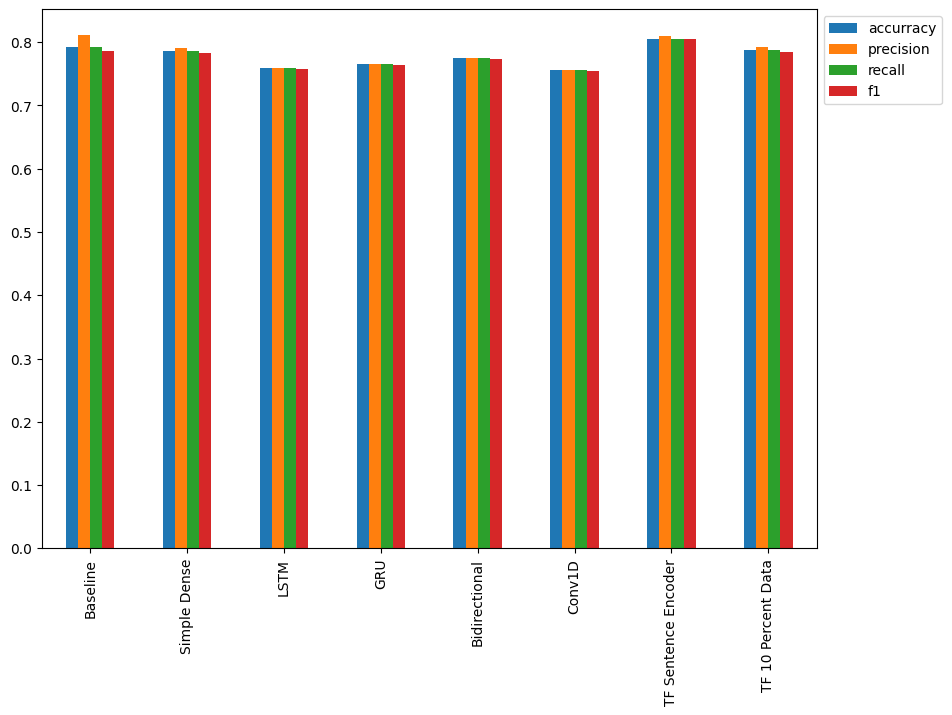

In [98]:
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

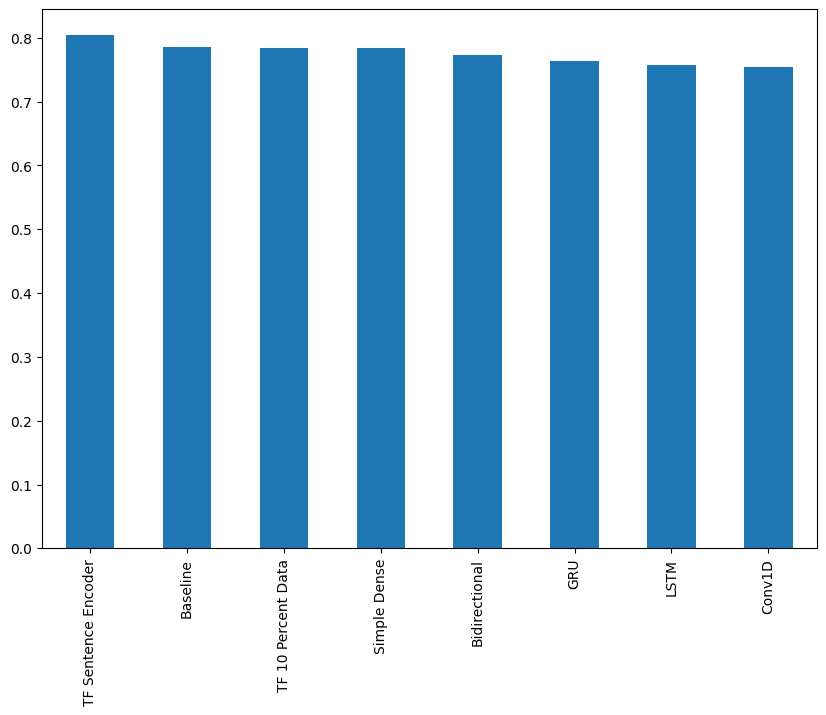

In [99]:
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10, 7));

## Model Ensembling 

In [100]:
baseline_pred_probs = np.max(model_0.predict_proba(val_sentences), axis = 1)

#combining prediction probabilities
combined_pred_probs = baseline_pred_probs + tf.squeeze(model_2_pred_probs, axis=1) + tf.squeeze(model_6_pred_probs)

#averaging the prediction
combined_preds = tf.round(combined_pred_probs/3)
combined_preds[:20]                       

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 1.], dtype=float32)>

In [101]:
ensemble_results = calculate_results(val_labels, combined_preds)
ensemble_results

{'accurracy': 77.55905511811024,
 'precision': 0.7753235243028463,
 'recall': 0.7755905511811023,
 'f1': 0.7753912286736995}

In [102]:
ensemble_results["accurracy"] = ensemble_results["accurracy"] / 100
ensemble_results["accurracy"] 

0.7755905511811023

In [103]:
all_model_results.loc["Ensemble Results"] = ensemble_results

In [104]:
all_model_results

,accurracy,precision,recall,f1
Baseline,0.792651,0.811139,0.792651,0.786219
Simple Dense,0.786089,0.790328,0.786089,0.783297
LSTM,0.758530,0.758485,0.758530,0.757313
GRU,0.765092,0.765079,0.765092,0.763960
Bidirectional,0.774278,0.774220,0.774278,0.773335
Conv1D,0.755906,0.755648,0.755906,0.754885
TF Sentence Encoder,0.804462,0.809626,0.804462,0.804297
TF 10 Percent Data,0.787402,0.792322,0.787402,0.784411
Ensemble Results,0.775591,0.775324,0.775591,0.775391


In [105]:
val_df = pd.DataFrame({"text": val_sentences,
                       "target": val_labels,
                       "pred": model_7_preds,
                       "pred_prob": tf.squeeze(model_7_pred_probs)})
val_df.head()

,text,target,pred,pred_prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.421230
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.690094
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.955413
3,@camilacabello97 Internally and externally scr...,1,0.0,0.157256
4,Radiation emergency #preparedness starts with ...,1,0.0,0.463609


In [106]:
# most wronged predictions
most_wrong = val_df[val_df["target"] != val_df["pred"]].sort_values("pred_prob", ascending=False)
most_wrong[:10]

,text,target,pred,pred_prob
49,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.853491
285,@Azimel 'Screaming Mad Scientist deceased afte...,0,1.0,0.783376
759,FedEx will no longer transport bioterror patho...,0,1.0,0.758002
119,@freefromwolves GodsLove &amp; #thankU brother...,0,1.0,0.755146
567,@RebeccaforReal accepts Wisconsin Emergency Re...,0,1.0,0.747523
440,Do you have a plan? Emergency Preparedness for...,0,1.0,0.734152
109,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES W...,0,1.0,0.732637
303,Trafford Centre film fans angry after Odeon ci...,0,1.0,0.728534
549,Day 2. Liquidation of emergency at chemical ob...,0,1.0,0.708768
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.695388


In [107]:
# False positives Most Wrong
for row in most_wrong[:10].itertuples():
    _, text, target, pred, prob = row
    print(f"Target: {target}, Pred: {int(pred)}, Prob: {prob}")
    print(f"Text:\n{text}\n")
    print("----\n")

Target: 0, Pred: 1, Prob: 0.853491485118866
Text:
@madonnamking RSPCA site multiple 7 story high rise buildings next to low density character residential in an area that floods

----

Target: 0, Pred: 1, Prob: 0.7833763957023621
Text:
@Azimel 'Screaming Mad Scientist deceased after tumbling over heels and falling into sinkhole during investigation'

----

Target: 0, Pred: 1, Prob: 0.758001983165741
Text:
FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J

----

Target: 0, Pred: 1, Prob: 0.755146324634552
Text:
@freefromwolves GodsLove &amp; #thankU brother Danny for RT of NEW VIDEO http://t.co/cybKsXHF7d The Coming Apocalyptic US Earthquake &amp; Tsunami

----

Target: 0, Pred: 1, Prob: 0.747523307800293
Text:
@RebeccaforReal accepts Wisconsin Emergency Response Plan on behalf of @GovWalker #nbc15 http://t.co/Pis0aiVRbR

----

Target: 0, Pred: 1, Prob: 0.7341524958610535
Text:
Do you have a plan? Emergency Preparedness for #Families

In [108]:
# false negatives
for row in most_wrong[-10:].itertuples():
    _, text, target, pred, prob = row
    print(f"Target: {target}, Pred: {int(pred)}, Prob: {prob}")
    print(f"Text:\n{text}\n")
    print("----\n")

Target: 1, Pred: 0, Prob: 0.08166284114122391
Text:
@BoyInAHorsemask its a panda trapped in a dogs body

----

Target: 1, Pred: 0, Prob: 0.07470449805259705
Text:
Rand Paul's Debate Strategy 'demolish Some other bad ideas out there or point out maybe that there are some em... http://t.co/qzdqRBr4Lh

----

Target: 1, Pred: 0, Prob: 0.07203110307455063
Text:
@SoonerMagic_ I mean I'm a fan but I don't need a girl sounding off like a damn siren

----

Target: 1, Pred: 0, Prob: 0.06648256629705429
Text:
Indeed!! I am fully aware of that battle! I support you in that fight!!  https://t.co/MctJnZX4H8

----

Target: 1, Pred: 0, Prob: 0.05570875480771065
Text:
So this storm just came out of no where. .fuck me its cool

----

Target: 1, Pred: 0, Prob: 0.055599987506866455
Text:
@Zak_Bagans this is Sabrina my dad rescued her from some dude who kept her in a cage. We've had her since I was 4 http://t.co/1k2PhQcuW8

----

Target: 1, Pred: 0, Prob: 0.049988579005002975
Text:
Ron &amp; Fez - Dave's H

## Making Prediction On Test Data

In [109]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [110]:
# making prediction on test data
test_sentences = test_df["text"].to_list()
test_samples = random.sample(test_sentences, 10)

for test_sample in test_samples:
    pred_prob = tf.squeeze(model_6.predict([test_sample]))
    pred = tf.round(pred_prob)
    print(f"Pred: {int(pred)}, Prob: {pred_prob}")
    print(f"Text:\n{test_sample}\n")
    print("----\n")
  

1/1 [==============================] - 0s 43ms/step
Pred: 0, Prob: 0.10197276622056961
Text:
SCREAMING BECAUSE 5SOS IS IN TX
@5SOS

----

1/1 [==============================] - 0s 37ms/step
Pred: 0, Prob: 0.10322122275829315
Text:
I just rescued you in MGS Ground Zeroes @HIDEO_KOJIMA_EN  haha. Amazing...Sept 1st cant come soon enough :)

----

1/1 [==============================] - 0s 35ms/step
Pred: 0, Prob: 0.14072027802467346
Text:
13 reasons why we love women in the military   - lulgzimbestpicts http://t.co/BcBfCStZXh http://t.co/ViK72Id8Zu

----

1/1 [==============================] - 0s 52ms/step
Pred: 0, Prob: 0.0
Text:
@_Gags_ My Mommy will be devastated lol #NoMorePod

----

1/1 [==============================] - 0s 26ms/step
Pred: 1, Prob: 0.9150083661079407
Text:
Here's a quick timelapse I made of the Finger Rock Fire last night from about 9PM - 1AM. Check it out! #fingerrockfire #wildfire #catalinas

----

1/1 [==============================] - 0s 32ms/step
Pred: 1, Prob: 0

In [111]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [112]:
pred_prob = tf.squeeze(model_6.predict(test_df["text"].to_numpy()))
pred = tf.round(pred_prob)
pred_prob[:10]

102/102 [==============================] - 1s 6ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([0.5955067 , 0.91154635, 0.8219068 , 1.0291215 , 1.1504847 ,
       0.54779464, 0.10661656, 0.        , 0.        , 0.09171779],
      dtype=float32)>

In [113]:
pred[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 1., 1., 1., 0., 0., 0., 0.], dtype=float32)>

In [114]:
test_data = test_df[:]

In [115]:
submission = test_df[['id']].reset_index(drop=True)
submission['target'] = tf.cast(pred, tf.int64)
submission

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,0
